# <a id='toc1_'></a>[SI618 Project Part 2: Analysis](#toc0_)

# <a id='toc2_'></a>[Project Title — *World of Board Games: What decide their popularity and ratings?*](#toc0_)

**Table of contents**<a id='toc0_'></a>    
- [SI618 Project Part 2: Analysis](#toc1_)    
- [Project Title — *World of Board Games: What decide their popularity and ratings?*](#toc2_)    
  - [Team Members](#toc2_1_)    
  - [Descriptive Analysis](#toc2_2_)    
    - [Rating of the games](#toc2_2_1_)    
    - [Popularity of the games](#toc2_2_2_)    
    - [Numerical factors of the games](#toc2_2_3_)    
      - [Year published](#toc2_2_3_1_)    
      - [Player number](#toc2_2_3_2_)    
      - [Playing time](#toc2_2_3_3_)    
    - [Categorical factors of games](#toc2_2_4_)    
      - [Game category](#toc2_2_4_1_)    
      - [Game mechanics](#toc2_2_4_2_)    
      - [Game publishers](#toc2_2_4_3_)    
      - [Game designers](#toc2_2_4_4_)    
  - [Inferential Statistics](#toc2_3_)    
    - [Category](#toc2_3_1_)    
    - [Year](#toc2_3_2_)    
    - [Correlations](#toc2_3_3_)    
  - [Graphical Analysis](#toc2_4_)    
    - [Correlations](#toc2_4_1_)    
    - [Difference discovered in t test](#toc2_4_2_)    
    - [Playing time and number of players](#toc2_4_3_)    
  - [Comparative Analysis](#toc2_5_)    
    - [Divided by years(decades)](#toc2_5_1_)    
    - [Relationship of numeric variables](#toc2_5_2_)    
  - [Multivariate Analysis](#toc2_6_)    
    - [Two dividing variables we introduced before:](#toc2_6_1_)    
    - [Minplayers](#toc2_6_2_)    
  - [Synthesis](#toc2_7_)    
  - [Reflection](#toc2_8_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc2_1_'></a>[Team Members](#toc0_)
- Keqing Lu (keqinglu)
- Xiyuan Wang (denniswx)
- Fangqing Yuan (fangqing)

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind

In [64]:
# import processed data from project 1
ready_data = pd.read_pickle('board_games.pkl')

In [60]:
ready_data.head() # check the first few rows of the data

,num_x,id,name,year,rank,average,bayes_average,users_rated,url,thumbnail,...,designer_list,publisher_list,category_count,family_count,mechanic_count,expansion_count,implementation_count,designer_count,publisher_count,artist_count
0,105,30549,Pandemic,2008,106,7.59,7.487,108975,/boardgame/30549/pandemic,https://cf.geekdo-images.com/S3ybV1LAp-8SnHIXL...,...,[Matt Leacock],"[Z-Man Games, Albi, Asmodee, Asmodee Italia, A...",1,9,7,7,11,1,33,5
1,189,822,Carcassonne,2000,190,7.42,7.309,108738,/boardgame/822/carcassonne,https://cf.geekdo-images.com/okM0dq_bEXnbyQTOv...,...,[Klaus-Jürgen Wrede],"[Hans im Glück, 999 Games, Albi, Bard Centrum ...",3,11,3,155,17,1,35,4
2,428,13,Catan,1995,429,7.14,6.970,108024,/boardgame/13/catan,https://cf.geekdo-images.com/W3Bsga_uLP9kO91gZ...,...,[Klaus Teuber],"[KOSMOS, 999 Games, Albi, Asmodee, Astrel Game...",2,5,9,87,29,1,48,11
3,72,68448,7 Wonders,2010,73,7.74,7.634,89982,/boardgame/68448/7-wonders,https://cf.geekdo-images.com/RvFVTEpnbb4NM7k0I...,...,[Antoine Bauza],"[Repos Production, ADC Blackfire Entertainment...",5,7,5,16,3,1,14,4
4,103,36218,Dominion,2008,104,7.61,7.499,81561,/boardgame/36218/dominion,https://cf.geekdo-images.com/j6iQpZ4XkemZP07HN...,...,[Donald X. Vaccarino],"[Rio Grande Games, 999 Games, Albi, Bard Centr...",2,3,5,46,2,1,23,9


## <a id='toc2_2_'></a>[Descriptive Analysis](#toc0_)

After the preliminary data manipulation in part 1, we have the following columns of data:

In [5]:
ready_data.columns

Index(['num_x', 'id', 'name', 'year', 'rank', 'average', 'bayes_average',
       'users_rated', 'url', 'thumbnail', 'num_y', 'primary', 'description',
       'yearpublished', 'minplayers', 'maxplayers', 'playingtime',
       'minplaytime', 'maxplaytime', 'minage', 'owned', 'trading', 'wanting',
       'wishing', 'category_list', 'mechanic_list', 'family_list',
       'expansion_list', 'implementation_list', 'artist_list', 'designer_list',
       'publisher_list', 'category_count', 'family_count', 'mechanic_count',
       'expansion_count', 'implementation_count', 'designer_count',
       'publisher_count', 'artist_count'],
      dtype='object')

In those columns, `id` is unique integer for each row / game, and `num_x` and `num_y` are other numeric variables assigned to each game from the two data frame in the original data.

For the purpose of our analysis, which investigates the factors making the games popular and/or highly rated, we are mainly interested in the following data:
- ratings of the games, described by `average` and `bayes_average`;
- popularity of the games, described by `owned`, `trading`, `wanting`, `wishing` and `users_rated`;
- numerical factors of the games, including `yearpublished`, player number `minplayers` and `maxplayers`, playing time including `minplaytime` and `maxplaytime`, and `minage`;
- categorical factors including game category, game mechanics, game family, expansions, implementations, artists, designers, publishers, and their counts for each game.

### <a id='toc2_2_1_'></a>[Rating of the games](#toc0_)

Both `average` and `bayes_average` are float numeric variables. Each board has an average rating based on ratings given by the users on the platform. `average` is the statistical mean, and `bayes_average` is calculated with prior information.

These two variables are potentially the `y` we want to predict in our machine learning model in future part 3, in order to answer the question we raised: **" What factors affect the rating of board games?"**

In [27]:
ready_data[['average', 'bayes_average']].describe().T

,count,mean,std,min,25%,50%,75%,max
average,21631.0,6.417249,0.929345,1.04,5.83,6.450,7.040,9.570
bayes_average,21631.0,5.683664,0.366096,0.00,5.51,5.546,5.678,8.511


- Here we can see that the `bayes_average` is overall lower, and has a smaller standard deviation (distributed more tightly around the mean) compared with `average`.
- We have demonstrated by histograms in part 1 that `average` has a seemingly Gaussian distribution.
- For `bayes_average`, we do not have information of the prior used.
- We may only use `average` as the `y` in our future model.

### <a id='toc2_2_2_'></a>[Popularity of the games](#toc0_)

Another question to be answered is: **"What factors affect the popularity of board games?"** There are several variables we think that are related to board game popularity:

- `users_rated` Integer. Number of users who rated the board game;
- `owned` Integer. Number of users who own the board game;
- `trading` Integer. Number of users who are offering to trade this board game;
- `wanting` Integer. Number of users who mark they want to get this board game from trade;
- `wishing` Integer. Number of users who mark this board game on their wishlist;

We may assume all these variables reflect the popularity of a board game to some extend. To answer **"What are the measurements for a board game's popularity and how well it is appreciated by its players?"**, we may have to design a single variable derived from those variables. This will be addressed in part 3.

In [28]:
ready_data[['users_rated', 'owned', 'trading', 'wanting', 'wishing']].describe().T

,count,mean,std,min,25%,50%,75%,max
users_rated,21631.0,874.548518,3695.946026,30.0,57.0,124.0,397.0,108975.0
owned,21631.0,1487.924553,5395.077773,0.0,150.0,322.0,903.5,168364.0
trading,21631.0,43.585965,102.410851,0.0,5.0,13.0,38.0,2508.0
wanting,21631.0,42.030373,117.940355,0.0,3.0,9.0,29.0,2011.0
wishing,21631.0,233.655587,800.657809,0.0,14.0,39.0,131.0,19325.0


In [31]:
ready_data[['users_rated', 'owned', 'trading', 'wanting', 'wishing']].corr()

,users_rated,owned,trading,wanting,wishing
users_rated,1.000000,0.985501,0.809579,0.709147,0.812746
owned,0.985501,1.000000,0.824295,0.677025,0.796129
trading,0.809579,0.824295,1.000000,0.544071,0.610320
wanting,0.709147,0.677025,0.544071,1.000000,0.939377
wishing,0.812746,0.796129,0.610320,0.939377,1.000000


We can see that:

- All variables are valid (non-negative).
- Most values are within tens and hundreds, while there are extremely 'popular' games with tens of thousands people having/wanting.
- Overall, owning > rated > wishing > wanting / trading. It reflects that possibly:
- - People who own the game may not choose to rate the game;
- - People who wish to have the game may not actively be seeking to purchase it;
- - The demand and supply of trading on the platform have a balance with slightly more people looking to sell the game;
- All these popularity-related variables are highly correlated. It may indicate that we could simply choose one of the variables to represent the popularity.

### <a id='toc2_2_3_'></a>[Numerical factors of the games](#toc0_)

There are numeric feature of each board game, including:
- `yearpublished` Integer. The year the game was originally published;
- `minplayers` Integer. Minimum number of players needed to play the game;
- `maxplayers` Integer. Maximum number of players allowed to play the game;
- `playingtime`, `maxplaytime`, `minplaytime` Integers. Maximum and minimum playing time (in minutes);
- `minage` Integer. Minimum age allowed to play the game.

In [32]:
ready_data[['yearpublished', 'minplayers', 'maxplayers', 'playingtime',
       'minplaytime', 'maxplaytime', 'minage']].describe().T

,count,mean,std,min,25%,50%,75%,max
yearpublished,21631.0,1986.094910,210.042496,-3500.0,2001.0,2011.0,2017.0,2023.0
minplayers,21631.0,2.007027,0.688957,0.0,2.0,2.0,2.0,10.0
maxplayers,21631.0,5.709491,15.102385,0.0,4.0,4.0,6.0,999.0
playingtime,21631.0,90.509177,534.826511,0.0,25.0,45.0,90.0,60000.0
minplaytime,21631.0,63.647774,447.213702,0.0,20.0,30.0,60.0,60000.0
maxplaytime,21631.0,90.509177,534.826511,0.0,25.0,45.0,90.0,60000.0
minage,21631.0,9.611391,3.640562,0.0,8.0,10.0,12.0,25.0


#### <a id='toc2_2_3_1_'></a>[Year published](#toc0_)

We can see that most games are published within the 21st century. Meanwhile, there are some very ancient games, which lowers the mean value.

In [14]:
pd.set_option('display.max_colwidth', None)
ready_data[ready_data.yearpublished == -3500].description

3622    Senet is an ancient Egyptian board game similar to backgammon.  Each player has 5 pawns which travel around a 3 by 10 board in an S shaped path.  Movement is dictated by the throw of 4 sticks (black on one side and white on the other) which can produce a 1,2,3,4, or 6, (5 is not possible) depending on how they land..  As in backgammon, the objective is to bear all of one's pawns off first.  A couple of interesting differences is that there are safe and trap spaces on the board.  Also, players may block each others' progress as in Parchisi.  Senet sets are usually constructed from various woods and are often quite beautiful.  Senet is one of the oldest boardgames but unfortunately it fell out of use for a few thousand years and no ancient rules set has been discovered.  Undoubtably another tragic loss resulting from the Library of Alexandria burning to the ground.  As a result scholars has made several educated guesses as to the rules.  The most popular versions are in the files

For example, the most ancient game is "Senet", which dates back to Ancient Egypt. Obviously -3500 is an approximation.

The year with most games published is 2017, while the top 10 years constitute the entire 2010s.

#### <a id='toc2_2_3_2_'></a>[Player number](#toc0_)

In [41]:
ready_data.minplayers.value_counts().head(5)

minplayers
2    14834
1     3675
3     2462
4      503
5       59
Name: count, dtype: int64

In [42]:
ready_data.maxplayers.value_counts().head(5)

maxplayers
4    6810
2    4287
6    3969
5    2987
8    1218
Name: count, dtype: int64

In [20]:
players_range = ready_data.maxplayers - ready_data.minplayers
players_range.describe()

count    21631.000000
mean         3.702464
std         15.063117
min         -4.000000
25%          2.000000
50%          2.000000
75%          4.000000
max        997.000000
dtype: float64

In [48]:
(ready_data.maxplayers < ready_data.minplayers).sum()

129

We can see that:
- most games have a minimum player number of 2, while the number of maximum players commonly range from 2 to 8, with 4 being the most.
- There are some peculiar values, including:
- - 0 for `minplayers` and `maxplayers`, which may indicate data missing;
- - 999 for `maxplayers`, which may or maynot be an error but is interesting (as if the game designer doesn't really set a upper limit);
- - there are 129 entries with `maxplayers` smaller than `minplayers`, which probably indicates faulty data.

#### <a id='toc2_2_3_3_'></a>[Playing time](#toc0_)

In [43]:
ready_data.playingtime.value_counts().head(5)

playingtime
30     3804
60     3169
45     2182
20     2134
120    1704
Name: count, dtype: int64

In [47]:
ready_data.minplaytime.value_counts().head(5)

minplaytime
30    4417
60    2991
20    2654
45    2166
15    1893
Name: count, dtype: int64

In [26]:
playtime_range = ready_data.maxplaytime - ready_data.minplaytime
playtime_range.describe()

count    21631.000000
mean        26.861403
std        276.221914
min       -450.000000
25%          0.000000
50%          0.000000
75%         15.000000
max      21060.000000
dtype: float64

In [49]:
(ready_data.maxplaytime < ready_data.minplaytime).sum()

155

In [27]:
ready_data[ready_data.playingtime == 60000].description

9553    This is a wargame like no other.  While the map area (5 full size maps) has been repeated in other North Africa games, the game is detailed to a degree no other game has come close to.  If using the full rules you keep track of every individual plane and pilot in the three year campaign. Each counter on the board representing a ground unit is composed of many units which are kept track of on logs.  Supplies are kept track of and dispersed in a very detailed manner.&#10;&#10;From the rulebook we read how to run a game. &quot;CNA is a logistically-oriented game, and its play requires not only a lot of attention to logistics, but, if you will, a logistically sound methodology.&quot; It is suggested that you have 5 persons per side with the following duties.&#10;&#10;Commander-in-Chief: responsible for strategic decisions and to settle intra-team disputes.&#10;&#10;Logistics Commander: In charge of all supplies.  Accepts supply requisitions from the others and keeps all informed of

In [ ]:
(ready_data.playingtime != ready_data.maxplaytime).sum()

0

- First, we discovered that the `playingtime` and `maxplaytime` are the same. So we may simply ignore the `playingtime`.
- We find that the playing time of most games range within 10-180 minutes.
- The median of `minplaytime` is 30 minutes, and that of `maxplaytime` is 45 minutes.
- Over half of the games have the same listed `minplaytime` and `maxplaytime`.
- Similar with player numbers, there are some peculiar data, including:
- - a 0 for `maxplaytime` (probably missing data);
- - very large `maxplaytime` (from the description it is indeed an extremely complicated game);
- - and `maxplaytime` smaller than `minplaytime` (probably faulty data).

### <a id='toc2_2_4_'></a>[Categorical factors of games](#toc0_)

P.S. We want to explain here the reason we stored the `ready_data` as **pickle** file. Before we had list-like-string stored in those columns so we have to write a function to let Python perceive those strings as lists and store them into new columns. It turned out that when saving the DataFrame into csv file and read it again would make those lists into string again. We therefore decided to abandon csv and use pickle which could store lists properly.

The categorical factors are stored as lists in each cell. They are:

- `category`
- `mechanic`
- `family`
- `expansion`
- `implementation`
- `artist`
- `designer`
- `publisher`

Names are self-explanatory. With a factor X:
- the column named `X_list` is the list of Xs of the game;
- the column named `X_count` is the length of the respective `X_list`

#### <a id='toc2_2_4_1_'></a>[Game category](#toc0_)

In [68]:
ready_data.category_list.explode().value_counts().describe()

count      84.000000
mean      674.190476
std       901.588698
min         1.000000
25%       195.500000
50%       356.000000
75%       783.250000
max      6402.000000
Name: count, dtype: float64

In [67]:
ready_data.category_list.explode().value_counts().head(5)

category_list
Card Game     6402
Wargame       3820
Fantasy       2681
Party Game    1968
Dice          1847
Name: count, dtype: int64

In [32]:
ready_data.category_count.describe()

count    21631.000000
mean         2.618094
std          1.380869
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         14.000000
Name: category_count, dtype: float64

We can find that there are 84 unique game categories, the most common category is 'Card Game', and on average a game is afiliated with 2.62 categories.

#### <a id='toc2_2_4_2_'></a>[Game mechanics](#toc0_)

In [33]:
ready_data.mechanic_list.explode().value_counts().describe()

count     182.00000
mean      345.60989
std       742.08696
min         1.00000
25%        25.25000
50%        52.00000
75%       301.00000
max      6112.00000
Name: count, dtype: float64

In [69]:
ready_data.mechanic_list.explode().value_counts().head(5)

mechanic_list
Dice Rolling              6112
Hand Management           4421
Set Collection            2936
Variable Player Powers    2719
Hexagon Grid              2371
Name: count, dtype: int64

In [35]:
ready_data.mechanic_count.describe()

count    21631.000000
mean         2.907910
std          2.189651
min          0.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         20.000000
Name: mechanic_count, dtype: float64

There are 182 unique game mechanics, the most common mechanics is 'Dice Rolling', and on average a game has 2.91 mechanics.

#### <a id='toc2_2_4_3_'></a>[Game publishers](#toc0_)

In [36]:
ready_data.publisher_list.explode().value_counts().describe()

count    7068.000000
mean        8.268251
std        32.347544
min         1.000000
25%         1.000000
50%         1.000000
75%         4.000000
max       597.000000
Name: count, dtype: float64

In [70]:
ready_data.publisher_list.explode().value_counts().head(5)

publisher_list
Hasbro              597
(Self-Published)    594
Asmodee             571
Ravensburger        520
Parker Brothers     486
Name: count, dtype: int64

In [38]:
ready_data.publisher_count.describe()

count    21631.000000
mean         2.701678
std          5.448527
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        207.000000
Name: publisher_count, dtype: float64

There are 7068 unique publishers. The publisher with the most published games is 'Hasbro'. On average a publisher published 8.27 games [without excluding categories like '(Self-Published)' or '(Web-Published)'], but over half of publishers just have 1 game recorded. On average a game is published by 2.70 publishers.

#### <a id='toc2_2_4_4_'></a>[Game designers](#toc0_)

In [39]:
ready_data.designer_list.explode().value_counts().describe()

count    9796.000000
mean        3.019600
std        21.663193
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max      2041.000000
Name: count, dtype: float64

In [71]:
ready_data.designer_list.explode().value_counts().head(5)

designer_list
(Uncredited)       2041
Reiner Knizia       329
Joseph Miranda      134
Wolfgang Kramer     133
Richard H. Berg     111
Name: count, dtype: int64

In [41]:
ready_data.designer_count.describe()

count    21631.000000
mean         1.367482
std          0.768842
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         21.000000
Name: designer_count, dtype: float64

There are 9796 unique designers. The designer with the most designed games, excluding '(Uncredited)', is 'Reiner Knizia'. On average a designer designed 3.02 games [without excluding '(Uncredited)']. On average, a game has 1.37 designers.

## <a id='toc2_3_'></a>[Inferential Statistics](#toc0_)

### <a id='toc2_3_1_'></a>[Category](#toc0_)

In part 1 we discussed that different game categories may have different ratings, let's explore this opportunity.

In [72]:
def is_in_list(list, item):
    '''
    check if an item is in a list
    '''
    if item in list:
        return 1
    else:
        return 0

In [73]:
card_game_ratings = ready_data[ready_data['category_list'].apply(lambda x: is_in_list(x, 'Card Game')) == 1]['average']
non_card_game_ratings = ready_data[ready_data['category_list'].apply(lambda x: is_in_list(x, 'Card Game')) == 0]['average']

ttest_ind(card_game_ratings, non_card_game_ratings, equal_var=False)

TtestResult(statistic=-10.516506892973101, pvalue=9.117796626762956e-26, df=13517.027964676321)

In [76]:
print(f"mean of average ratings for Card Games is: {card_game_ratings.mean()}\nmean of average ratings for non-Card Games is: {non_card_game_ratings.mean()}")

mean of average ratings for Card Games is: 6.320045298344268
mean of average ratings for non-Card Games is: 6.4581121544421825


We conducted a [Welch's T-test](https://en.wikipedia.org/wiki/Welch%27s_t-test) [**<font color = red>1</font>**](#reference) on the ratings of games who **has** the category 'Card Game' with the ratings of those who **has not** the category 'Card Game'. The test is defined as the following:

- Let the `average` of games who **has** the category 'Card Game' be $\{X_1,X_2,....X_n\}$
- Let the `average` of games who **has not** the category 'Card Game' be $\{Y_1,Y_2,....Y_m\}$

The test statistics:

\begin{align}
t&=\frac{\bar{X}-\bar{Y}}{\sqrt{s_X^2+s_Y^2}}
\end{align}

Where $\bar{X},\bar{Y}$ are sample means, and $s_X^2,s_Y^2$ are the variances of the sample means.

$t$ can be approximated to follow a t distribution with degree of freedom $v$:

\begin{align}
v\approx \frac{\big(s_X^2+s_Y^2\big)^2}{\frac{s_X^4}{n-1}+\frac{s_Y^4}{m-1}}
\end{align}

And the hypotheses are:

\begin{align}
H_0 &: \bar{X}=\bar{Y}
\\
H_1 &: \bar{X}\ne\bar{Y}
\end{align}

All t tests we used in these project part 2 follow same definition

Based on the test statistics ($pvalue < 0.05$), we may reject the null hypothesis and state that we are 95% confident that the means of average ratings of games who are and are not Card Game are significantly different.

### <a id='toc2_3_2_'></a>[Year](#toc0_)

A similar t test is conducted for games with older and newer publish dates:

In [74]:
median_year = ready_data['year'].median()
old_year_ratings = ready_data[ready_data['year'] < median_year]['average']
new_year_ratings = ready_data[ready_data['year'] >= median_year]['average']

ttest_ind(old_year_ratings, new_year_ratings, equal_var=False)

TtestResult(statistic=-55.1884190689741, pvalue=0.0, df=21103.390417804843)

In [75]:
median_year

2011.0

Based on the test statistics, we may say that the means of average ratings of game published before and no earlier than 2011 are significantly different.

In [77]:
print(f"mean of average ratings for games published before {median_year} is: {old_year_ratings.mean()}\nmean of average ratings for games published after {median_year} is: {new_year_ratings.mean()}")

mean of average ratings for games published before 2011.0 is: 6.069407013396375
mean of average ratings for games published after 2011.0 is: 6.724880216046693


By demonstrating two tests, we found that both numeric and categorical factors of board game may play a significant role in determining ratings.

### <a id='toc2_3_3_'></a>[Correlations](#toc0_)

We listed the top pairs of numeric variables which have the highest correlation in absolute values

In [81]:
correlations = ready_data[['year', 'average', 'bayes_average',
       'users_rated',
       'minplayers', 'maxplayers',
       'minplaytime', 'maxplaytime', 'minage', 'owned', 'trading', 'wanting',
       'wishing', 'category_count', 'family_count', 'mechanic_count',
       'expansion_count', 'implementation_count', 'designer_count',
       'publisher_count', 'artist_count']].corr()
num_var = len(correlations)
vars = list(correlations.index)
cor_values = []
for i in range(num_var):
    for j in range(i+1, num_var):
        cor_values.append((vars[i], vars[j], correlations.iloc[i, j]))
cor_values.sort(key=lambda x: x[2]**2, reverse=True)
pd.DataFrame(cor_values[:10], columns=['Variable 1', 'Variable 2', 'Correlation'])

,Variable 1,Variable 2,Correlation
0,users_rated,owned,0.985501
1,wanting,wishing,0.939377
2,minplaytime,maxplaytime,0.856547
3,bayes_average,wanting,0.831362
4,owned,trading,0.824295
5,users_rated,wishing,0.812746
6,users_rated,trading,0.809579
7,owned,wishing,0.796129
8,bayes_average,wishing,0.774552
9,users_rated,wanting,0.709147


Some observations:

- popularity-related variables are highly correlated;
- playing time variables are highly correlated, but max and min number of players do not have the same pattern;
- Bayesian average is highly correlated to wanting and wishing, this may lead us guessing if the popularity is used as a prior information to compute Bayesian average in the original data.

## <a id='toc2_4_'></a>[Graphical Analysis](#toc0_)

In part 1 we already included lots of analytical visualizations. In part 2 we will focus on visualizing interesting feature we discussed.

### <a id='toc2_4_1_'></a>[Correlations](#toc0_)

First we may visualize the correlation among popularity-related variables and Bayesian average

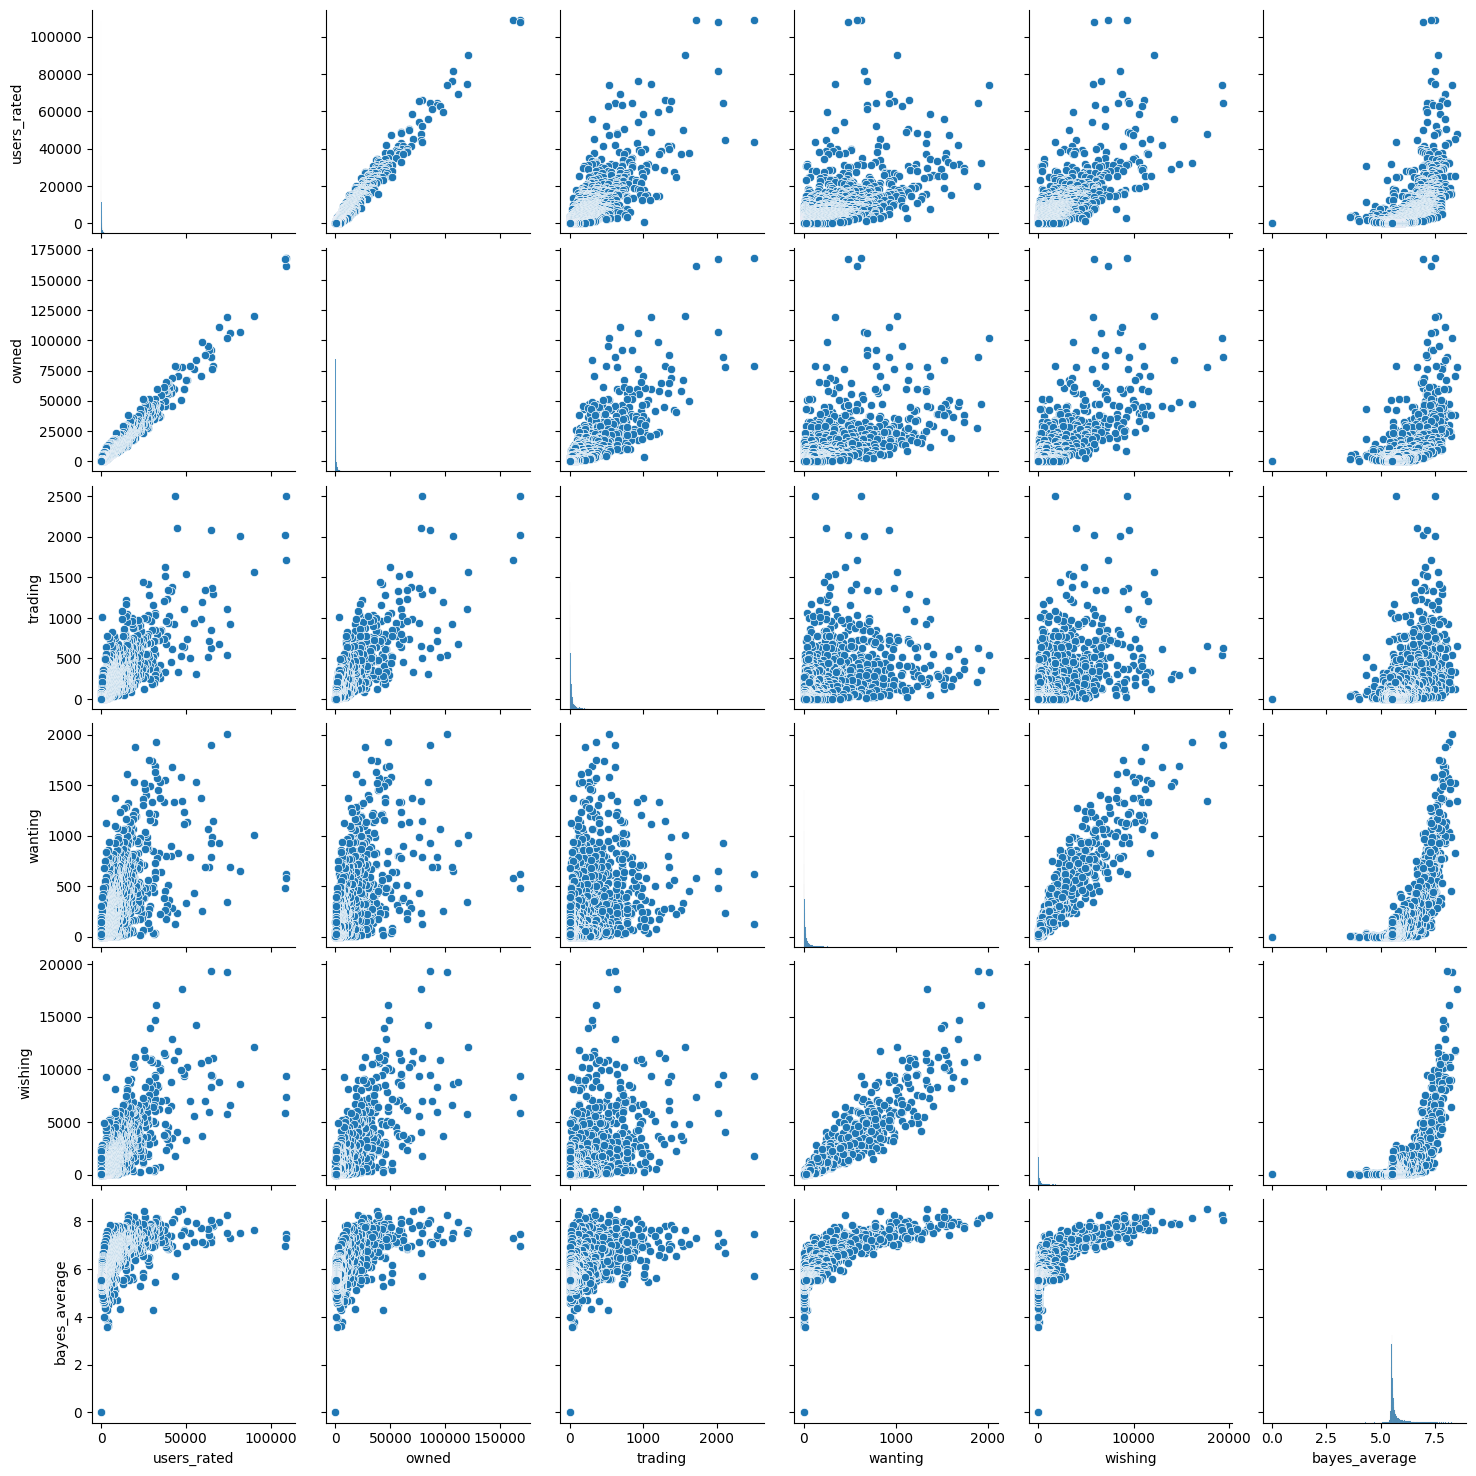

In [82]:
sns.pairplot(ready_data[['users_rated', 'owned', 'trading', 'wanting', 'wishing', 'bayes_average']])

In [91]:
cor = ready_data[['users_rated', 'owned', 'trading', 'wanting', 'wishing', 'bayes_average']].corr()
cor.style.background_gradient(cmap='coolwarm')

,users_rated,owned,trading,wanting,wishing,bayes_average
users_rated,1.000000,0.985501,0.809579,0.709147,0.812746,0.631918
owned,0.985501,1.000000,0.824295,0.677025,0.796129,0.637469
trading,0.809579,0.824295,1.000000,0.544071,0.610320,0.610937
wanting,0.709147,0.677025,0.544071,1.000000,0.939377,0.831362
wishing,0.812746,0.796129,0.610320,0.939377,1.000000,0.774552
bayes_average,0.631918,0.637469,0.610937,0.831362,0.774552,1.000000


### <a id='toc2_4_2_'></a>[Difference discovered in t test](#toc0_)

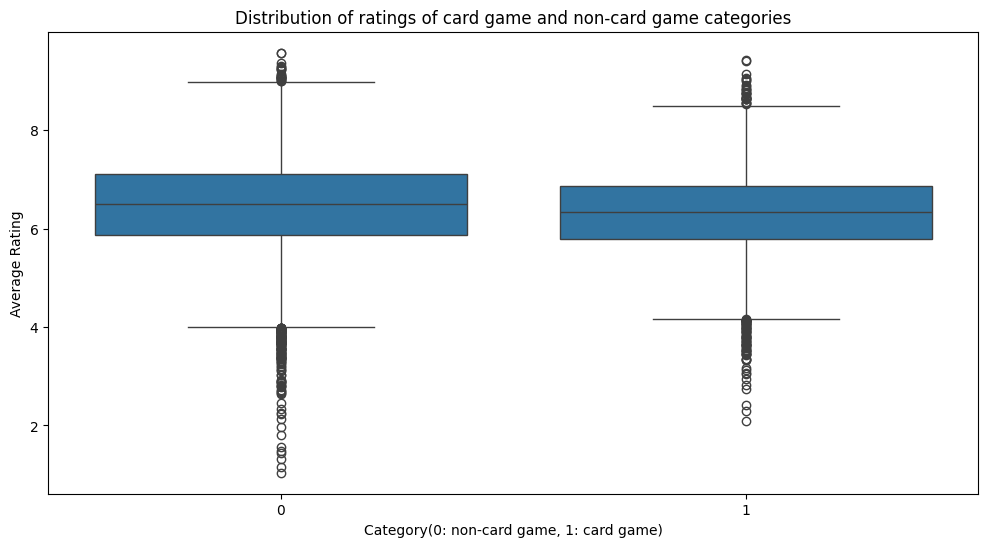

In [96]:
top_categories_data = pd.DataFrame({'is_card_game': ready_data['category_list'].apply(lambda x: is_in_list(x, 'Card Game')), 'average': ready_data['average']})
plt.figure(figsize=(12, 6))
sns.boxplot(data=top_categories_data, x='is_card_game', y='average')
plt.title('Distribution of ratings of card game and non-card game categories')
plt.xlabel('Category(0: non-card game, 1: card game)')
plt.ylabel('Average Rating')
plt.show()

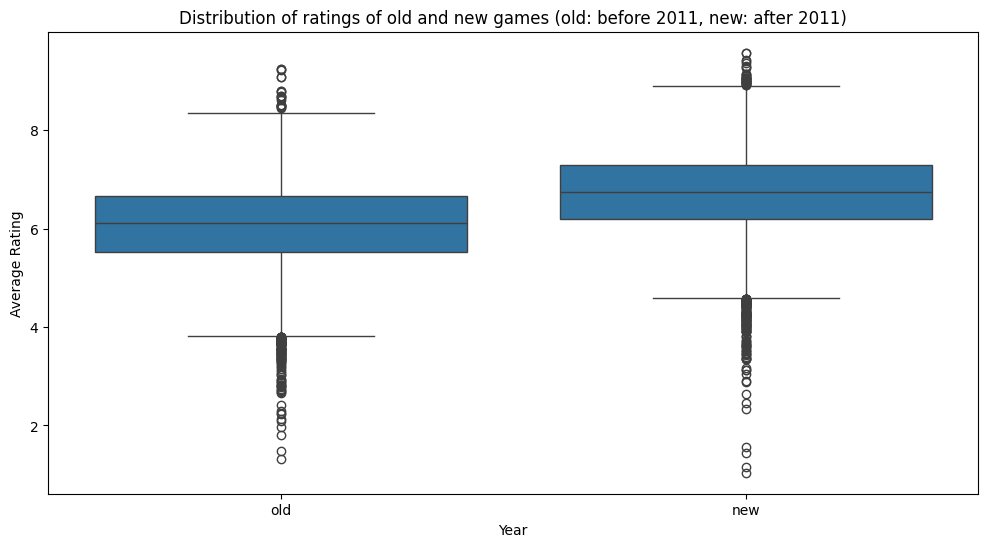

In [97]:
year_data = pd.DataFrame({'old_new': np.where(ready_data['year'] < 2011, 'old', 'new'), 'average': ready_data['average']})
plt.figure(figsize=(12, 6))
sns.boxplot(data=year_data, x='old_new', y='average')
plt.title('Distribution of ratings of old and new games (old: before 2011, new: after 2011)')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.show()

### <a id='toc2_4_3_'></a>[Playing time and number of players](#toc0_)

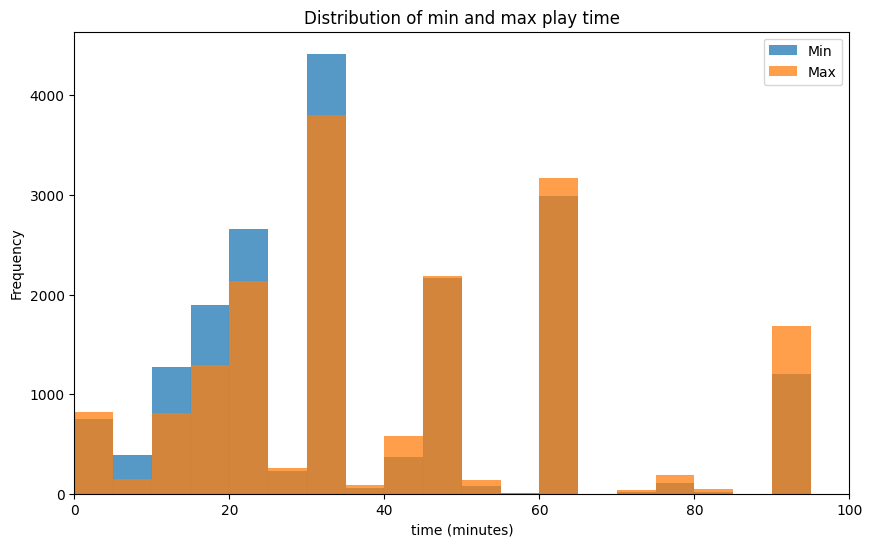

In [102]:
plt.figure(figsize=(10, 6))
sns.histplot(ready_data['minplaytime'], binwidth=5)
sns.histplot(ready_data['maxplaytime'], binwidth=5)
plt.title('Distribution of min and max play time')
plt.xlabel('time (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, 100)
plt.legend(['Min', 'Max'])
plt.show()

We may see:

- In shorter times, min distribute more than max; in longer times, max distribute more than min;
- but for time=0, the possibly false value in max appears;
- some numbers are preferred, i.e. 35 minutes or 70 minutes are not common estimate for playing time, as people like to describe time in quarters, half an hour, or hours;

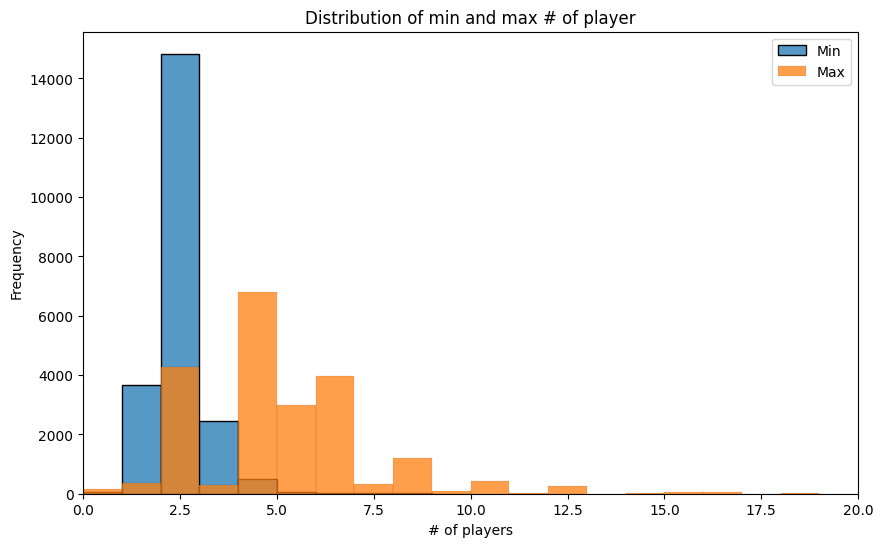

In [105]:
plt.figure(figsize=(10, 6))
sns.histplot(ready_data['minplayers'], binwidth=1)
sns.histplot(ready_data['maxplayers'], binwidth=1)
plt.title('Distribution of min and max # of player')
plt.xlabel('# of players')
plt.ylabel('Frequency')
plt.xlim(0, 20)
plt.legend(['Min', 'Max'])
plt.show()

- most games need at least 2 players;
- most games need at most 4 players;
- there are more variations in max players, and min players focused on small numbers from 1~3
- This trend is expected since games requiring more players are less common and potentially less accessible to gather.

## <a id='toc2_5_'></a>[Comparative Analysis](#toc0_)

Our category variables are stored as lists, so it may be less intuitive to divide the data.

### <a id='toc2_5_1_'></a>[Divided by years(decades)](#toc0_)

In [106]:
bins = [-3500, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020, 2030]
labels = ['1900s', '1910s', '1920s', '1930s', '1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']
ready_data['decade_category'] = pd.cut(ready_data['yearpublished'], bins=bins, labels=labels, right=False)

In [108]:
mean_users_rated_by_decade = ready_data.groupby('decade_category')['users_rated'].mean()
mean_average_by_decade = ready_data.groupby('decade_category')['average'].mean()

C:\Users\yuanf\AppData\Local\Temp\ipykernel_41132\930307160.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_users_rated_by_decade = ready_data.groupby('decade_category')['users_rated'].mean()
C:\Users\yuanf\AppData\Local\Temp\ipykernel_41132\930307160.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_average_by_decade = ready_data.groupby('decade_category')['average'].mean()


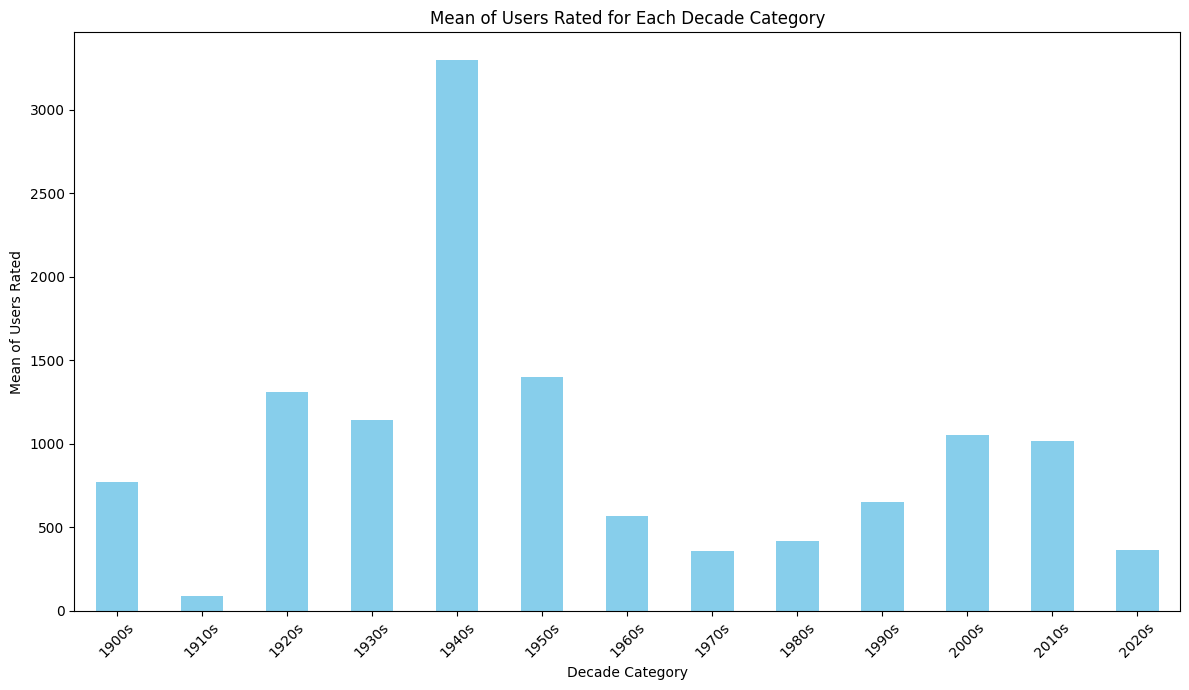

In [109]:
plt.figure(figsize=(12, 7))
mean_users_rated_by_decade.plot(kind='bar', color='skyblue')
plt.xlabel('Decade Category')
plt.ylabel('Mean of Users Rated')
plt.title('Mean of Users Rated for Each Decade Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

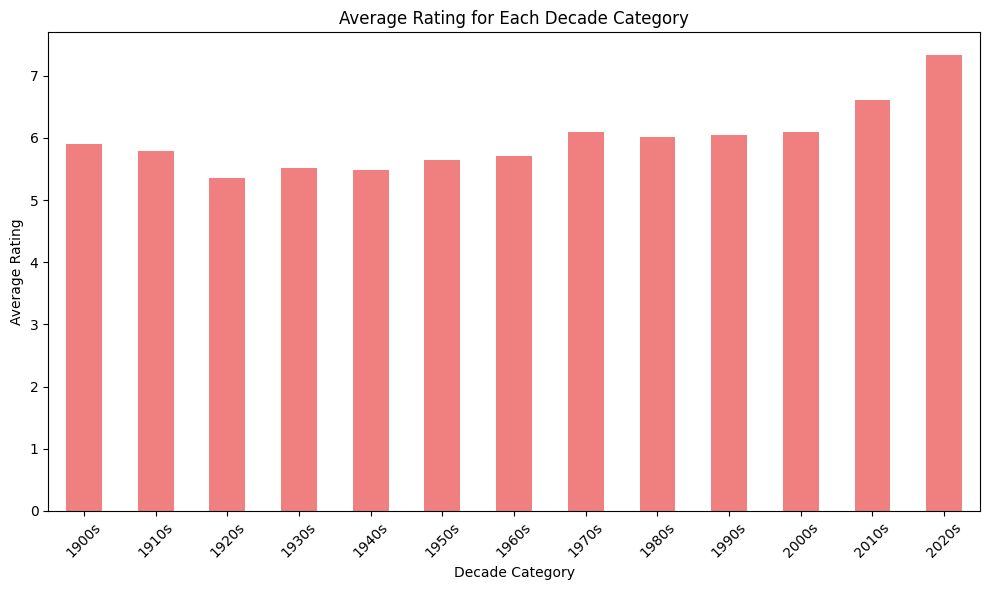

In [111]:
plt.figure(figsize=(10, 6))
mean_average_by_decade.plot(kind='bar', color='lightcoral')
plt.xlabel('Decade Category')
plt.ylabel('Average Rating')
plt.title('Average Rating for Each Decade Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The first chart, showing the mean of users rated, has a noticeable peak in one of the mid-century decades, significantly higher than the others. This peak suggests a particular decade where games were rated by a significantly larger number of users, potentially indicating a time of increased popularity or a few games with extremely high engagement. It could also be caused by a extremely popular game in the decade that raised the mean;

Conversely, the average rating chart is relatively stable across decades with less variation between each decade. However, there is a general trend of increasing average ratings over time, particularly notable in the 2020s. This matches our previous discovery that new games are rated higher than old games.

The stability of the average rating indicates that despite the fluctuation in the number of users rating games, the overall quality or reception of the games (as perceived by the users) remains fairly consistent.

What's particularly interesting is the spike in users rating in the mid-century compared to other decades, which does not correlate with a similar spike in average rating. This could suggest that while more people were engaged with games during that time, it did not necessarily equate to higher satisfaction. The increase in the average rating in recent decades might indicate a trend towards higher quality or more well-received games, or it might reflect a change in how users rate games.

We further investigate the distribution of games in each decade:

C:\Users\yuanf\AppData\Local\Temp\ipykernel_41132\3973956126.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  num_of_game_by_decade = ready_data.groupby('decade_category').count()['name']


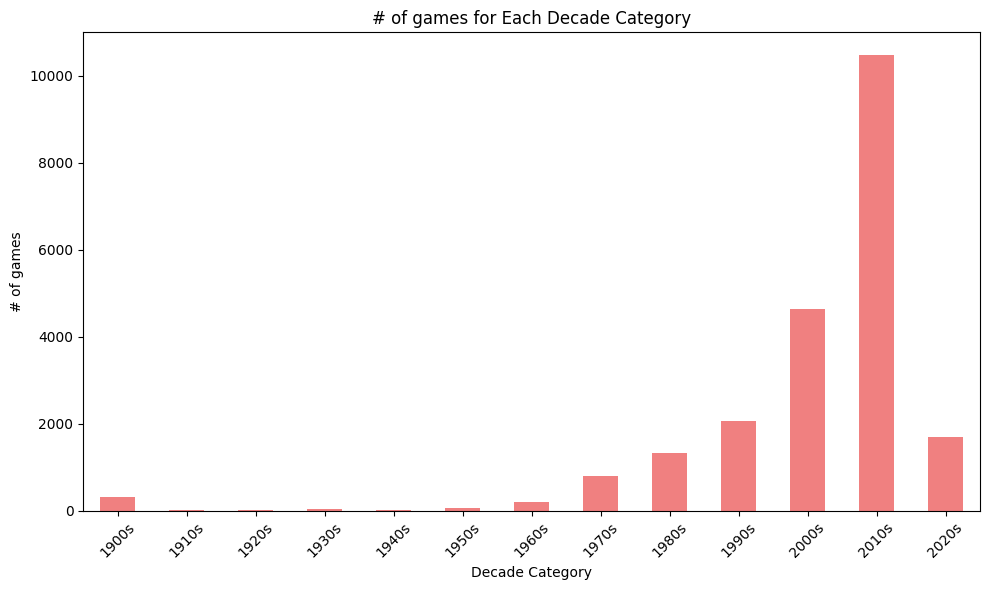

In [115]:
num_of_game_by_decade = ready_data.groupby('decade_category').count()['name']
plt.figure(figsize=(10, 6))
num_of_game_by_decade.plot(kind='bar', color='lightcoral')
plt.xlabel('Decade Category')
plt.ylabel('# of games')
plt.title('# of games for Each Decade Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The histogram of number of games does not have the same pattern as last two plots.

There is a increasing trend with peak in 2010s. Although 2020s is not finished yet so we do not know if there are going to be more games than 2010s.

The increasing trends in rantings and qualities indicate the board game industry is on a prosperous track.

### <a id='toc2_5_2_'></a>[Relationship of numeric variables](#toc0_)

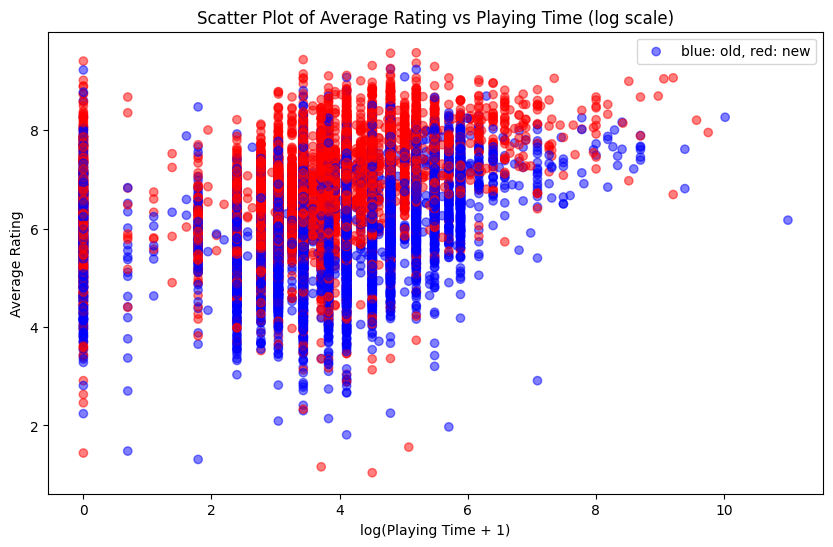

In [128]:
ready_data['old_new'] = np.where(ready_data['year'] < 2011, 'old', 'new')
plt.figure(figsize=(10, 6))
plt.scatter(np.log(ready_data['playingtime']+1), ready_data['average'], alpha=0.5, c=ready_data['old_new'].map({'old': 'blue', 'new': 'red'}))
plt.xlabel('log(Playing Time + 1)')
plt.ylabel('Average Rating')
plt.title('Scatter Plot of Average Rating vs Playing Time (log scale)')
plt.legend(['blue: old, red: new'])
plt.show()

- There are lots of game with max playing time as zero, which could be problematic;
- Most games have playing time in a short~medium range;
- The bulk of the games are played for shorter durations and have a wide range of ratings and user engagement. This could suggest that the market is saturated with many short-duration games that vary significantly in quality and popularity;
- But based on the log scale, games' playing time do vary from minutes to hours;
- Most games have a wide range of average ratings;
- there is a trend that games with longer playing time would have higher ratings and narrower range;
- the trend of new games having higher ratings is clearly shown;

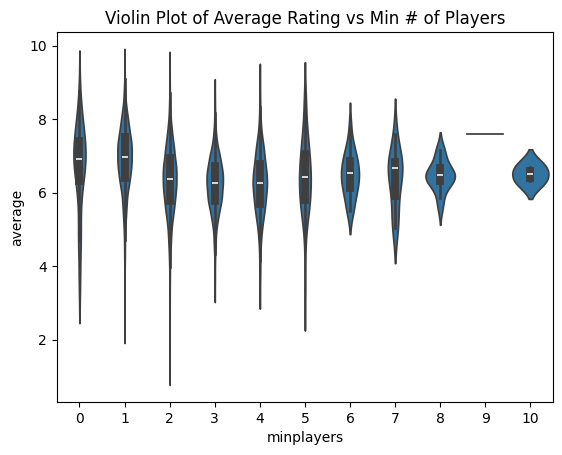

In [133]:
sns.violinplot(data=ready_data, x='minplayers', y='average')
plt.title('Violin Plot of Average Rating vs Min # of Players')
plt.show()

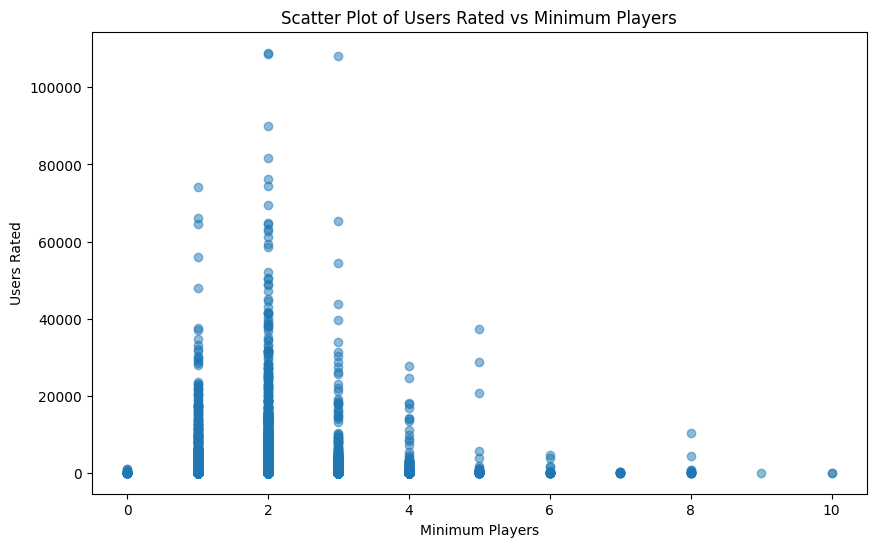

In [139]:
plt.figure(figsize=(10, 6))
plt.scatter(ready_data['minplayers'], ready_data['users_rated'], alpha=0.5)
plt.xlabel('Minimum Players')
plt.ylabel('Users Rated')
plt.title('Scatter Plot of Users Rated vs Minimum Players')
plt.show()

- There is a wider range of ratings for games that require a small number of players, it makes sense as previous histogram showed that most games have small minplayers, quantity introduces the variety;

- The average ratings seem fairly consistent across different player counts except for minplayers <= 1, suggesting that the quality of a game—as rated by users—is not significantly impacted by the number of players it requires.
- But when minplayers <= 1, the mean of average ratings seem higher than the rest, indicating a more accessible game may have higher ratings and popularity.

In the 'Users Rated' vs 'Minimum Players' scatter plot, the observations are:

- Games requiring 2 players seem to have a higher number of ratings, which might indicate their popularity or availability.
- As the minimum number of players increases, the number of users who have rated the games tends to decrease. This could imply that games requiring more players are less widely played or rated.
- There is an overall decrease in user ratings as the minimum number of players increases. However, it’s important to note that this does not necessarily mean these games are less popular since a game designed for a large number of players could still be popular in the right setting (like party games).

Overall Interpretation:

- The number of minimum players required for a game does not appear to have a strong influence on the average rating of the game, indicating that the number of participants may not be the driven force motivating players rate games.
- Games that require fewer players receive more ratings, which could be due to greater accessibility or the fact that it's easier to gather smaller groups to play.
- The data suggests that games designed for 2-4 players are common and have wide appeal, reflecting the gaming market's tendency to cater to relatively small groups.

## <a id='toc2_6_'></a>[Multivariate Analysis](#toc0_)

### <a id='toc2_6_1_'></a>[Two dividing variables we introduced before:](#toc0_)

In [140]:
ready_data['is_card_game'] = ready_data['category_list'].apply(lambda x: is_in_list(x, 'Card Game'))

In [141]:
ct = pd.crosstab(ready_data.is_card_game, ready_data.old_new, margins=True)
ct

old_new,new,old,All
is_card_game,,,
0,7366,7863,15229
1,4113,2289,6402
All,11479,10152,21631


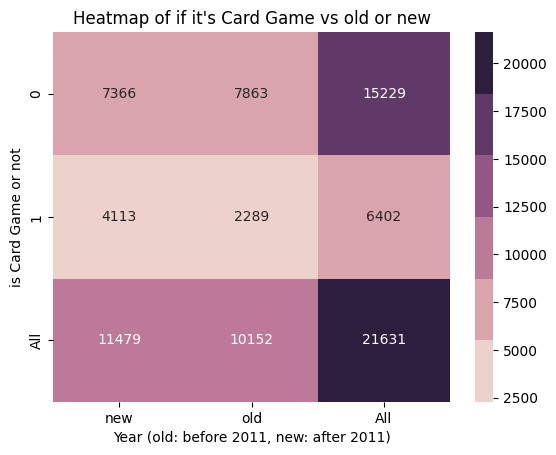

In [143]:
sns.heatmap(ct,annot=True,cmap=sns.cubehelix_palette(),fmt='d')
plt.title("Heatmap of if it's Card Game vs old or new")
plt.xlabel('Year (old: before 2011, new: after 2011)')
plt.ylabel('is Card Game or not')
plt.show()

We may see that the number of card games increased in recent years while the number of non-card game remains relatively same from the old time.

We can further inspect the means of average ratings:

In [144]:
average_per_card_time = ready_data.pivot_table(
    index='is_card_game',
    columns='old_new',
    values='average',
    aggfunc='mean'
)
average_per_card_time

old_new,new,old
is_card_game,,
0,6.813621,6.125074
1,6.565954,5.878183


This coincides with our discovery that newer and non card games received higher ratings.

### <a id='toc2_6_2_'></a>[Minplayers](#toc0_)

We may divide the data in another way introduced by the discovery of potential difference of ratings based on minplayers

In [147]:
ready_data['small_game'] = np.where(ready_data['minplayers'] <= 1, 'small', 'large')
ct = pd.crosstab(ready_data.small_game, ready_data.old_new, margins=True)
ct

old_new,new,old,All
small_game,,,
large,8774,9138,17912
small,2705,1014,3719
All,11479,10152,21631


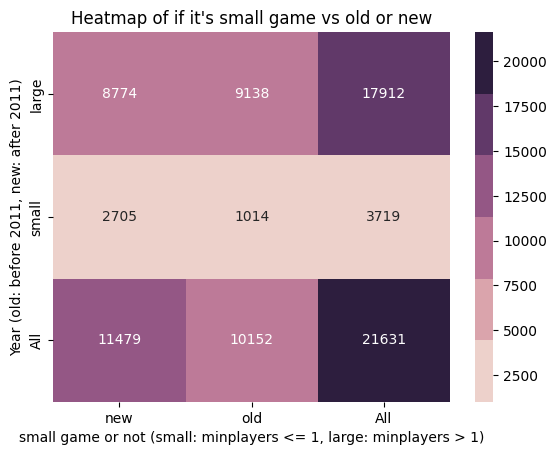

In [148]:
sns.heatmap(ct,annot=True,cmap=sns.cubehelix_palette(),fmt='d')
plt.title("Heatmap of if it's small game vs old or new")
plt.xlabel('small game or not (small: minplayers <= 1, large: minplayers > 1)')
plt.ylabel('Year (old: before 2011, new: after 2011)')
plt.show()

There are more smaller games in recent years, which matches our hypothesis that the market tends to introduce relatively small games that could lead to higher popularity.

In [150]:
average_per_small_time = ready_data.pivot_table(
    index='small_game',
    columns='old_new',
    values='average',
    aggfunc='mean'
)
average_per_small_time

old_new,new,old
small_game,,
large,6.604897,6.035867
small,7.114059,6.371667


It matches that newer games are more highly rated, and smaller games are also rated higher.

A t test could be applicable:

In [152]:
small_ratings = ready_data[ready_data['small_game'] == "small"]['average']
large_ratings = ready_data[ready_data['small_game'] == "large"]['average']

ttest_ind(small_ratings, large_ratings, equal_var=False)

TtestResult(statistic=37.278600506259586, pvalue=3.7200968512757925e-271, df=5452.7741454007)

We can reject the null hypothesis that smaller and larger games have same mean of average ratings.

## <a id='toc2_7_'></a>[Synthesis](#toc0_)

## <a id='toc2_8_'></a>[Reflection](#toc0_)

<a id='reference'>
<strong>Reference</strong>
</a>

- [1] https://en.wikipedia.org/wiki/Welch%27s_t-test
- [2] Project Part 1